## SEASON dataframe & EDA

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import re
import csv
from datetime import datetime
import os
import time
import dask
import json
import pickle

In [2]:
#opening pickle files
# with open ('EVENT.PKL', 'rb') as f:
#     event_df= pickle.load(f)

In [3]:
with open ('HOMERUNS.PKL', 'rb') as f:
    homeruns_df= pickle.load(f)

In [4]:
with open ('OFFENSE.PKL', 'rb') as f:
    offense_df= pickle.load(f)

In [5]:
with open ('STANDINGS.PKL', 'rb') as f:
    standings_df= pickle.load(f)

In [6]:
with open ('target_df.PKL', 'rb') as f:
    target_df= pickle.load(f)

In [7]:
# event_df.gameDate=[x.replace(x[-10:], '', len(event_df.gameDate)) for x in event_df.gameTimeUTC]

In [8]:
# event_df.drop(['gameTimeUTC'], axis=1, inplace=True)

In [9]:
# event_df

## Data cleaning

In [10]:
homeruns_df

,gameDate,playerId,playerName,homeRuns,date
67,2018-03-29,607680,Kevin Pillar,1.0,2018-03-29
70,2018-03-29,443558,Nelson Cruz,1.0,2018-03-29
79,2018-03-29,518934,DJ LeMahieu,1.0,2018-03-29
94,2018-03-29,446263,Lucas Duda,1.0,2018-03-29
99,2018-03-29,605412,Joe Panik,1.0,2018-03-29
...,...,...,...,...,...
185534,2021-04-30,571745,Mitch Haniger,1.0,2021-04-30
185535,2021-04-30,666182,Bo Bichette,1.0,2021-04-30
185537,2021-04-30,545341,Randal Grichuk,1.0,2021-04-30
185543,2021-04-30,543305,Aaron Hicks,1.0,2021-04-30


In [11]:
df=pd.read_csv('players.csv')

In [12]:
df

,playerId,playerName,DOB,mlbDebutDate,birthCity,birthStateProvince,birthCountry,heightInches,weight,primaryPositionCode,primaryPositionName,playerForTestSetAndFuturePreds
0,665482,Gilberto Celestino,1999-02-13,2021-06-02,Santo Domingo,NaN,Dominican Republic,72,170,8,Outfielder,False
1,593590,Webster Rivas,1990-08-08,2021-05-28,Nagua,NaN,Dominican Republic,73,219,3,First Base,True
2,661269,Vladimir Gutierrez,1995-09-18,2021-05-28,Havana,NaN,Cuba,73,190,1,Pitcher,True
3,669212,Eli Morgan,1996-05-13,2021-05-28,Rancho Palos Verdes,CA,USA,70,190,1,Pitcher,True
4,666201,Alek Manoah,1998-01-09,2021-05-27,Homestead,FL,USA,78,260,1,Pitcher,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2056,672695,Geraldo Perdomo,1999-10-22,NaN,Santo Domingo,NaN,Dominican Republic,74,203,6,Shortstop,True
2057,672911,Jesus Cruz,1995-04-15,NaN,Salinas de Hidalgo,San Luis Potosi,Mexico,73,230,1,Pitcher,False
2058,676103,Damon Jones,1994-09-30,NaN,Twin Falls,ID,USA,77,233,1,Pitcher,True
2059,676755,Isaac Mattson,1995-07-14,NaN,Erie,PA,USA,74,205,1,Pitcher,True


In [13]:
#creating a dictionary for player Id: playername
a=list(df.playerId)

In [14]:
#creating a dictionary for player Id: playername
b=list(df.playerName)

In [15]:
#dictionary created
dictionary = dict(zip(a,b))

In [137]:
dictionary1=dict(zip(b,a))

In [16]:
standings_df

,teamName,gameDate,divisionRank,leagueRank,wildCardRank,xWinLossPct
0,Chicago Cubs,2018-03-29,1,3,3,0.0
1,Miami Marlins,2018-03-29,4,12,12,0.0
2,New York Mets,2018-03-29,2,5,5,1.0
3,Texas Rangers,2018-03-29,5,14,13,0.0
4,Atlanta Braves,2018-03-29,1,2,2,0.0
...,...,...,...,...,...,...
16455,St. Louis Cardinals,2021-04-30,2,6,4,0.6
16456,Arizona Diamondbacks,2021-04-30,4,5,3,0.833
16457,San Francisco Giants,2021-04-30,1,2,NaN,0.667
16458,Washington Nationals,2021-04-30,3,11,8,0.667


In [17]:
target_df

,engagementMetricsDate,playerId,target1,target2,target3,target4
0,2018-01-02,628317,0.011167070542384616,4.474708171206226,0.005167729742499409,5.735294117647059
1,2018-01-02,547989,0.04299322158818077,5.593385214007783,0.04503307347035199,2.794117647058824
2,2018-01-02,519317,0.9743269048230578,56.17704280155642,13.693745570517363,64.16666666666667
3,2018-01-02,607625,0.0067002423254307695,2.6750972762645913,0.005167729742499409,1.8627450980392157
4,2018-01-02,592547,0.0011167070542384616,0.632295719844358,0.002952988424285377,0.9313725490196079
...,...,...,...,...,...,...
4249776,2021-05-01,451661,0,0.013314249575608294,0,0.6259246614316604
4249777,2021-05-01,519301,0.00013148828965292353,0.0033285623939020735,0,0.21622851940366453
4249778,2021-05-01,527055,0,0.019971374363412443,0,0.27313076135199726
4249779,2021-05-01,543484,0.00013148828965292353,0.056585560696335246,0,1.0242403550699897


In [18]:
#data cleaning the date 
target_df = target_df.rename(columns = {'engagementMetricsDate': 'gameDate'}, inplace = False)

In [19]:
#taking only the first 7 digits of the target column
target_df.target1= target_df.target1.map(lambda x: x[0:6])
target_df.target2= target_df.target2.map(lambda x: x[0:6])
target_df.target3= target_df.target3.map(lambda x: x[0:6])
target_df.target4= target_df.target4.map(lambda x: x[0:6])

In [20]:
# workframe=target_df.T

In [21]:
df3=pd.read_csv('awards.csv')
df3.drop(['Unnamed: 0'], axis=1, inplace=True)

In [22]:
df3

,awardId,awardName,awardDate,awardSeason,playerId,playerName,awardPlayerTeamId
0,VWLCPOY,VWL Comeback Player of the Year,2018-01-15,2017,150119,Freddy Garcia,699
1,VWLPOY,VWL Pitcher of the Year,2018-01-15,2017,446861,Guillermo Moscoso,699
2,VWLMOY,VWL Manager of the Year,2018-01-15,2017,492527,Mike Rojas,695
3,VWLRLOY,VWL Reliever of the Year,2018-01-15,2017,519246,Andres Santiago,694
4,VWLOPOY,VWL Offensive Player of the Year,2018-01-15,2017,543874,Jose Vargas,699
...,...,...,...,...,...,...,...
6203,NLPOM,NL Player of the Month,2021-04-30,2021,660670,Ronald Acuna Jr.,144
6204,ALRRELMON,AL Reliever of the Month,2021-04-30,2021,598264,Matt Barnes,111
6205,ALPOM,AL Player of the Month,2021-04-30,2021,621439,Byron Buxton,142
6206,ALROM,AL Rookie of the Month,2021-04-30,2021,606213,Yermin Mercedes,145


In [23]:
#joining award with target df
work= pd.merge(target_df, df3, how='outer', on= ['playerId'])

In [24]:
offense_df

,gameDate,teamName,playerName,atBats,rbi,homeRuns
0,2018-03-29,Los Angeles Dodgers,Austin Barnes,0.0,0.0,0.0
1,2018-03-29,Tampa Bay Rays,Mallex Smith,0.0,0.0,0.0
2,2018-03-29,Philadelphia Phillies,Odubel Herrera,0.0,0.0,0.0
3,2018-03-29,Los Angeles Angels,Jefry Marte,0.0,0.0,0.0
4,2018-03-29,Kansas City Royals,Paulo Orlando,0.0,0.0,0.0
...,...,...,...,...,...,...
185673,2021-04-30,San Francisco Giants,Logan Webb,2.0,0.0,0.0
185674,2021-04-30,Milwaukee Brewers,Freddy Peralta,2.0,0.0,0.0
185675,2021-04-30,Colorado Rockies,Jon Gray,2.0,0.0,0.0
185676,2021-04-30,San Diego Padres,Yu Darvish,2.0,0.0,0.0


In [25]:
#offense df with names instead of id
offense_df.playerName.replace(dictionary, inplace=True)

In [26]:
offense_df.rename(columns={'playerName': 'playerId'}, inplace=True)
offense_df.drop(['teamName'], axis=1, inplace=True)

In [27]:
work.gameDate.replace('engagementMetricsDate', np.nan).dropna(axis=0, inplace=True)

In [28]:
work.dropna(axis=0, inplace=True)

In [29]:
work2= pd.merge(work, offense_df, how='outer', on= ['playerId'])

In [30]:
work2

,gameDate_x,playerId,target1,target2,target3,target4,awardId,awardName,awardDate,awardSeason,playerName,awardPlayerTeamId,gameDate_y,atBats,rbi,homeRuns
0,2018-01-02,628317,0.0111,4.4747,0.0051,5.7352,MLBSECOND,All-MLB Second Team,2020-12-09,2020,Kenta Maeda,142,NaN,NaN,NaN,NaN
1,2018-01-03,628317,0.0063,2.5210,0.0016,2.7669,MLBSECOND,All-MLB Second Team,2020-12-09,2020,Kenta Maeda,142,NaN,NaN,NaN,NaN
2,2018-01-04,628317,0.0035,2.3809,0.0036,3.4393,MLBSECOND,All-MLB Second Team,2020-12-09,2020,Kenta Maeda,142,NaN,NaN,NaN,NaN
3,2018-01-05,628317,0.0033,3.3323,0.0122,4.8496,MLBSECOND,All-MLB Second Team,2020-12-09,2020,Kenta Maeda,142,NaN,NaN,NaN,NaN
4,2018-01-06,628317,0.0239,1.4407,0.0015,2.3712,MLBSECOND,All-MLB Second Team,2020-12-09,2020,Kenta Maeda,142,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495689,NaN,Patrick Weigel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-28,0.0,0.0,0.0
6495690,NaN,Tyler Zuber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-28,1.0,0.0,0.0
6495691,NaN,Justin Lawrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-29,0.0,0.0,0.0
6495692,NaN,Ben Rortvedt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-30,3.0,1.0,0.0


In [31]:
work2.rename(columns={'gameDate_x': 'gameDate'}, inplace=True)

In [32]:
work2.drop(['gameDate_y'], axis=1, inplace=True)

In [33]:
# work3.isna().sum()

In [34]:
work2.playerId.dropna(axis=0, inplace=True)

In [35]:
work2.playerId.isna().sum()

0

In [36]:
work2

,gameDate,playerId,target1,target2,target3,target4,awardId,awardName,awardDate,awardSeason,playerName,awardPlayerTeamId,atBats,rbi,homeRuns
0,2018-01-02,628317,0.0111,4.4747,0.0051,5.7352,MLBSECOND,All-MLB Second Team,2020-12-09,2020,Kenta Maeda,142,NaN,NaN,NaN
1,2018-01-03,628317,0.0063,2.5210,0.0016,2.7669,MLBSECOND,All-MLB Second Team,2020-12-09,2020,Kenta Maeda,142,NaN,NaN,NaN
2,2018-01-04,628317,0.0035,2.3809,0.0036,3.4393,MLBSECOND,All-MLB Second Team,2020-12-09,2020,Kenta Maeda,142,NaN,NaN,NaN
3,2018-01-05,628317,0.0033,3.3323,0.0122,4.8496,MLBSECOND,All-MLB Second Team,2020-12-09,2020,Kenta Maeda,142,NaN,NaN,NaN
4,2018-01-06,628317,0.0239,1.4407,0.0015,2.3712,MLBSECOND,All-MLB Second Team,2020-12-09,2020,Kenta Maeda,142,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495689,NaN,Patrick Weigel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
6495690,NaN,Tyler Zuber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
6495691,NaN,Justin Lawrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
6495692,NaN,Ben Rortvedt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.0


In [37]:
# work2.gameDate.dropna(axis=0, inplace=True)

In [38]:
work2.gameDate.replace('engagementMetricsDate', np.nan, inplace=True)

In [39]:
work2.gameDate.dropna(inplace=True, axis=0)

In [40]:
work2.isna().sum()

gameDate              757870
playerId                   0
target1               154290
target2               154290
target3               154290
target4               154290
awardId               154290
awardName             154290
awardDate             154290
awardSeason           154290
playerName            154290
awardPlayerTeamId     154290
atBats               6341404
rbi                  6341404
homeRuns             6341404
dtype: int64

In [41]:
work2.target1.dropna(axis=0, inplace=True)

In [42]:
work2.drop(['awardId', 'awardPlayerTeamId'], axis=1, inplace=True)

In [43]:
work2.columns

Index(['gameDate', 'playerId', 'target1', 'target2', 'target3', 'target4',
       'awardName', 'awardDate', 'awardSeason', 'playerName', 'atBats', 'rbi',
       'homeRuns'],
      dtype='object')

In [44]:
work2.gameDate.dropna(axis=0, inplace=True)

In [45]:
# work2.replace(np.nan, 'N/A', inplace=True)

In [46]:
work2.target1.dropna(axis=0, inplace=True)

In [47]:
work2.drop(['awardSeason'], axis=1, inplace=True)

In [48]:
work2.head()

,gameDate,playerId,target1,target2,target3,target4,awardName,awardDate,playerName,atBats,rbi,homeRuns
0,2018-01-02,628317,0.0111,4.4747,0.0051,5.7352,All-MLB Second Team,2020-12-09,Kenta Maeda,NaN,NaN,NaN
1,2018-01-03,628317,0.0063,2.5210,0.0016,2.7669,All-MLB Second Team,2020-12-09,Kenta Maeda,NaN,NaN,NaN
2,2018-01-04,628317,0.0035,2.3809,0.0036,3.4393,All-MLB Second Team,2020-12-09,Kenta Maeda,NaN,NaN,NaN
3,2018-01-05,628317,0.0033,3.3323,0.0122,4.8496,All-MLB Second Team,2020-12-09,Kenta Maeda,NaN,NaN,NaN
4,2018-01-06,628317,0.0239,1.4407,0.0015,2.3712,All-MLB Second Team,2020-12-09,Kenta Maeda,NaN,NaN,NaN


In [49]:
work2.gameDate=[str(x).replace('-', '') for x in work2.gameDate]

In [50]:
work2.gameDate=[float(x) for x in work2.gameDate]

In [51]:
work2.awardDate=[str(x).replace('-', '') for x in work2.awardDate]


In [52]:
work2.awardDate.replace('awardDate', np.nan, inplace=True)
work2.awardDate=[float(x) for x in work2.awardDate]
work2.awardDate.dropna(axis=0, inplace=True)

In [53]:
work2.drop('playerId', axis=1, inplace=True)

In [54]:
work2.atBats.replace('atBats', np.nan, inplace=True)

In [55]:
work2.atBats=[float(x) for x in work2.atBats]

In [56]:
work2.atBats.dropna(axis=0, inplace=True)

In [57]:
work2.rbi.replace('rbi', np.nan, inplace=True)
work2.rbi=[float(x) for x in work2.rbi]
work2.rbi.dropna(axis=0, inplace=True)

In [58]:
work2.homeRuns.replace('homeRuns', np.nan, inplace=True)
work2.homeRuns=[float(x) for x in work2.homeRuns]
work2.homeRuns.dropna(axis=0, inplace=True)

In [59]:
work2.replace('target', np.nan, inplace=True)
work2.target1=[float(x) for x in work2.target1]
work2.target1.dropna(axis=0, inplace=True)

work2.target2=[float(x) for x in work2.target2]
work2.target2.dropna(axis=0, inplace=True)

work2.target3=[float(x) for x in work2.target3]
work2.target3.dropna(axis=0, inplace=True)

work2.target4=[float(x) for x in work2.target4]
work2.target4.dropna(axis=0, inplace=True)

### Correlation matrix 

In [60]:
corr_mat=work2[['target1', 'target2', 'target3', 'target4', 'atBats', 'rbi', 'homeRuns']]

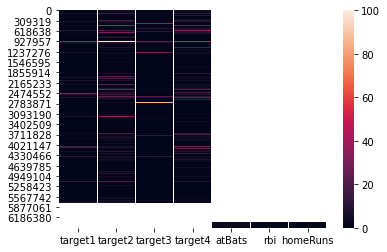

In [61]:
sns.heatmap(corr_mat, annot=False)
plt.show()

## Modelling with Light GBM

In [62]:
#loading LightGBM
import lightgbm as lgb


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
obj_feat = list(work2.loc[:, work2.dtypes == 'object'].columns.values)
obj_feat

['awardName', 'playerName']

### Predicting Target 1

In [65]:
work2['target1'].replace(np.nan, float(1.9281), inplace=True)

In [66]:
work2

,gameDate,target1,target2,target3,target4,awardName,awardDate,playerName,atBats,rbi,homeRuns
0,20180102.0,0.0111,4.4747,0.0051,5.7352,All-MLB Second Team,20201209.0,Kenta Maeda,NaN,NaN,NaN
1,20180103.0,0.0063,2.5210,0.0016,2.7669,All-MLB Second Team,20201209.0,Kenta Maeda,NaN,NaN,NaN
2,20180104.0,0.0035,2.3809,0.0036,3.4393,All-MLB Second Team,20201209.0,Kenta Maeda,NaN,NaN,NaN
3,20180105.0,0.0033,3.3323,0.0122,4.8496,All-MLB Second Team,20201209.0,Kenta Maeda,NaN,NaN,NaN
4,20180106.0,0.0239,1.4407,0.0015,2.3712,All-MLB Second Team,20201209.0,Kenta Maeda,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6495689,NaN,1.9281,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
6495690,NaN,1.9281,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
6495691,NaN,1.9281,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
6495692,NaN,1.9281,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.0


In [67]:
for feature in obj_feat:
    work2[feature] = pd.Series(work2[feature], dtype="category")

In [68]:
X= work2.drop(columns=['target1', 'target2', 'target3', 'target4'], axis=1)

y= work2.target1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [69]:
hyper_params = {
    'task': 'train',
    'objective': 'regression',
    'metric': ['l2', 'auc', 'mse'],
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 150,
    'verbose': 1,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 3000,
    "n_estimators": 1000, 
    'reg_lambda': .5,
    'reg_alpha': .75, 
    
}

In [70]:
# gbm = lgb.LGBMRegressor(**hyper_params, random_state=0, n_jobs=-1, silent=False)

In [71]:
lgb_train = lgb.Dataset(X_train, y_train)
gbm = lgb.train(hyper_params, lgb_train, num_boost_round=500, verbose_eval=True)

/Users/jeffreyng/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/jeffreyng/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2015
[LightGBM] [Info] Number of data points in the train set: 4546985, number of used features: 7
[LightGBM] [Info] Start training from score 1.926870
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [72]:
y_pred=gbm.predict(X_test)

In [73]:
# y_pred=[round(x,4) for x in y_pred]
# y_pred=[float(x) for x in y_pred]

In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, y_test)
rmse = mean_squared_error(y_pred, y_test, squared=False)
print(rmse)
print(mae)
print(work2.target1.mean())

4.162072293946554
0.8966028969037291
1.928091266782949


### Predicting Target 2

In [75]:
work2.target2.mean()

4.57675530607278

In [76]:
work2['target2'].replace(np.nan, float(4.5768), inplace=True)

In [77]:
X= work2.drop(columns=['target1', 'target2', 'target3', 'target4'], axis=1)

y= work2.target2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [78]:
hyper_params = {
    'task': 'train',
    'objective': 'regression',
    'metric': ['l2', 'auc', 'mse'],
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 3000,
    "n_estimators": 1000, 
    'reg_lambda': .5,
    'reg_alpha': .75}
lgb_train = lgb.Dataset(X_train, y_train)
gbm = lgb.train(hyper_params, lgb_train, num_boost_round=500, verbose_eval=True)

/Users/jeffreyng/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/jeffreyng/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [79]:
y_pred=gbm.predict(X_test)

In [80]:
mae = mean_absolute_error(y_pred, y_test)
rmse = mean_squared_error(y_pred, y_test, squared=False)
print(rmse)
print(mae)
print(work2.target2.mean())

4.179176320841334
1.2909773401464681
4.576760520623819


### Predicting Target 3

In [81]:
work2.target3.mean()

1.4912741534995333

In [82]:
work2['target3'].replace(np.nan, float(1.4913), inplace=True)

In [83]:
X= work2.drop(columns=['target1', 'target2', 'target3', 'target4'], axis=1)

y= work2.target3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [84]:
hyper_params = {
    'task': 'train',
    'objective': 'regression',
    'metric': ['l2', 'auc', 'mse'],
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 3000,
    "n_estimators": 1000, 
    'reg_lambda': 2,
    'reg_alpha': 1}
lgb_train = lgb.Dataset(X_train, y_train)
gbm = lgb.train(hyper_params, lgb_train, num_boost_round=500, verbose_eval=True)

/Users/jeffreyng/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/jeffreyng/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [85]:
y_pred=gbm.predict(X_test)

In [86]:
mae = mean_absolute_error(y_pred, y_test)
rmse = mean_squared_error(y_pred, y_test, squared=False)
print(rmse)
print(mae)
print(work2.target3.mean())

4.980691874788331
1.1030493035324545
1.4912771690656461


### Predicting Target 4

In [87]:
work2.target4.mean()

3.271552765420318

In [88]:
work2['target4'].replace(np.nan, float(3.2716), inplace=True)

In [89]:
X= work2.drop(columns=['target1', 'target2', 'target3', 'target4'], axis=1)

y= work2.target4

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [90]:
hyper_params = {
    'task': 'train',
    'objective': 'regression',
    'metric': ['l2', 'auc', 'mse'],
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 6,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 3000,
    "n_estimators": 1000, 
    'reg_lambda': 2,
    'reg_alpha': 1}
lgb_train = lgb.Dataset(X_train, y_train)
gbm = lgb.train(hyper_params, lgb_train, num_boost_round=500, verbose_eval=True)

/Users/jeffreyng/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/jeffreyng/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [91]:
y_pred=gbm.predict(X_test)

In [92]:
mae = mean_absolute_error(y_pred, y_test)
rmse = mean_squared_error(y_pred, y_test, squared=False)
print(rmse)
print(mae)
print(work2.target4.mean())

3.223422062372922
0.7700888374589472
3.2715582764704885


In [93]:
(0.8966028969037291+1.2909773401464681+1.1010956248395363+0.7056456920976173)/4

0.9985803884968376

## Submission Formatting

In [ ]:
work2

In [152]:
a=[round(x,0) for x in work2.gameDate]
b=work2.playerName

In [153]:
date_playerId=list(zip(a,b))

In [154]:
date_playerId

[(20180102.0, 628317),
 (20180103.0, 628317),
 (20180104.0, 628317),
 (20180105.0, 628317),
 (20180106.0, 628317),
 (20180107.0, 628317),
 (20180108.0, 628317),
 (20180109.0, 628317),
 (20180110.0, 628317),
 (20180111.0, 628317),
 (20180112.0, 628317),
 (20180113.0, 628317),
 (20180114.0, 628317),
 (20180115.0, 628317),
 (20180116.0, 628317),
 (20180117.0, 628317),
 (20180118.0, 628317),
 (20180119.0, 628317),
 (20180120.0, 628317),
 (20180121.0, 628317),
 (20180122.0, 628317),
 (20180123.0, 628317),
 (20180124.0, 628317),
 (20180125.0, 628317),
 (20180126.0, 628317),
 (20180127.0, 628317),
 (20180128.0, 628317),
 (20180129.0, 628317),
 (20180130.0, 628317),
 (20180131.0, 628317),
 (20180201.0, 628317),
 (20180202.0, 628317),
 (20180203.0, 628317),
 (20180204.0, 628317),
 (20180205.0, 628317),
 (20180206.0, 628317),
 (20180207.0, 628317),
 (20180208.0, 628317),
 (20180209.0, 628317),
 (20180210.0, 628317),
 (20180211.0, 628317),
 (20180212.0, 628317),
 (20180213.0, 628317),
 (20180214.

In [133]:
X_train.shape

(4546985, 7)

In [ ]:
date_playerId

### EDA Viz

Text(0.5, 1.0, 'Predictions vs Actual (Target 4)')

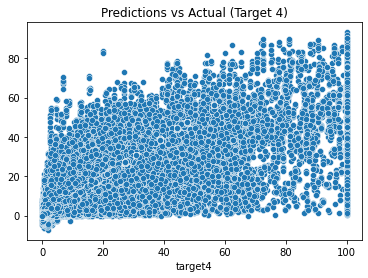

In [94]:
sns.scatterplot(y=y_pred, x=y_test)
plt.title('Predictions vs Actual (Target 4)')

In [95]:
target_df=target_df.set_index('playerId')

Text(0.5, 1.0, 'Fan Engagement Scores Distribution for Justin Verlander')

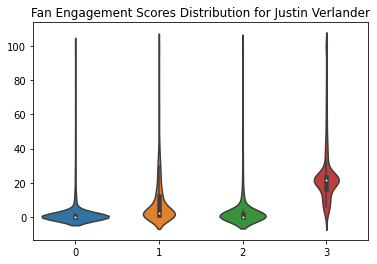

In [96]:
bx_data=target_df.loc['434378']
sns.violinplot(data=[bx_data['target1'], bx_data['target2'], bx_data['target3'], bx_data['target4']])
plt.title('Fan Engagement Scores Distribution for Justin Verlander')

In [97]:
df_dict=pd.DataFrame(data=dictionary, index=dictionary.values())

In [98]:
df_dict=pd.DataFrame(df_dict.T)

In [99]:
df_dict.rename({'Gilberto Celestino': 'Player_Name'}, inplace=True)

In [100]:
player_key=df_dict.reset_index().set_index('Gilberto Celestino')

In [101]:
player_key.loc['Justin Verlander']

index                           434378
Webster Rivas         Justin Verlander
Vladimir Gutierrez    Justin Verlander
Eli Morgan            Justin Verlander
Alek Manoah           Justin Verlander
                            ...       
Geraldo Perdomo       Justin Verlander
Jesus Cruz            Justin Verlander
Damon Jones           Justin Verlander
Isaac Mattson         Justin Verlander
Nick Allgeyer         Justin Verlander
Name: Justin Verlander, Length: 2061, dtype: object

In [102]:
player_key.loc['Fernando Tatis Jr.']

index                             665487
Webster Rivas         Fernando Tatis Jr.
Vladimir Gutierrez    Fernando Tatis Jr.
Eli Morgan            Fernando Tatis Jr.
Alek Manoah           Fernando Tatis Jr.
                             ...        
Geraldo Perdomo       Fernando Tatis Jr.
Jesus Cruz            Fernando Tatis Jr.
Damon Jones           Fernando Tatis Jr.
Isaac Mattson         Fernando Tatis Jr.
Nick Allgeyer         Fernando Tatis Jr.
Name: Fernando Tatis Jr., Length: 2061, dtype: object

Text(0.5, 1.0, 'Fan Engagement Scores Distribution for Fernando Tatis Jr.')

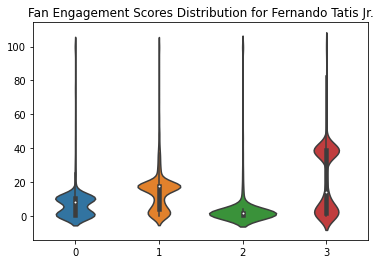

In [103]:
bx_data=target_df.loc['665487']
sns.violinplot(data=[bx_data['target1'], bx_data['target2'], bx_data['target3'], bx_data['target4']])
plt.title('Fan Engagement Scores Distribution for Fernando Tatis Jr.')

In [104]:
player_key.loc['Gary Sanchez']

index                       596142
Webster Rivas         Gary Sanchez
Vladimir Gutierrez    Gary Sanchez
Eli Morgan            Gary Sanchez
Alek Manoah           Gary Sanchez
                          ...     
Geraldo Perdomo       Gary Sanchez
Jesus Cruz            Gary Sanchez
Damon Jones           Gary Sanchez
Isaac Mattson         Gary Sanchez
Nick Allgeyer         Gary Sanchez
Name: Gary Sanchez, Length: 2061, dtype: object

Text(0.5, 1.0, 'Fan Engagement Scores Distribution for Gary Sanchez')

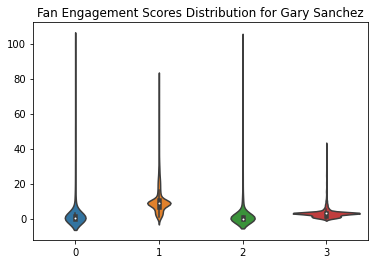

In [105]:
bx_data=target_df.loc['596142']
sns.violinplot(data=[bx_data['target1'], bx_data['target2'], bx_data['target3'], bx_data['target4']])
plt.title('Fan Engagement Scores Distribution for Gary Sanchez')

In [106]:
player_key.loc['Aaron Judge']

index                      592450
Webster Rivas         Aaron Judge
Vladimir Gutierrez    Aaron Judge
Eli Morgan            Aaron Judge
Alek Manoah           Aaron Judge
                         ...     
Geraldo Perdomo       Aaron Judge
Jesus Cruz            Aaron Judge
Damon Jones           Aaron Judge
Isaac Mattson         Aaron Judge
Nick Allgeyer         Aaron Judge
Name: Aaron Judge, Length: 2061, dtype: object

Text(0.5, 1.0, 'Fan Engagement Scores Distribution for Aaron Judge')

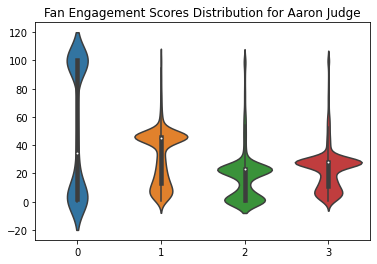

In [107]:
bx_data=target_df.loc['592450']
sns.violinplot(data=[bx_data['target1'], bx_data['target2'], bx_data['target3'], bx_data['target4']])
plt.title('Fan Engagement Scores Distribution for Aaron Judge')

In [108]:
player_key.loc['Shohei Ohtani']

index                        660271
Webster Rivas         Shohei Ohtani
Vladimir Gutierrez    Shohei Ohtani
Eli Morgan            Shohei Ohtani
Alek Manoah           Shohei Ohtani
                          ...      
Geraldo Perdomo       Shohei Ohtani
Jesus Cruz            Shohei Ohtani
Damon Jones           Shohei Ohtani
Isaac Mattson         Shohei Ohtani
Nick Allgeyer         Shohei Ohtani
Name: Shohei Ohtani, Length: 2061, dtype: object

Text(0.5, 1.0, 'Fan Engagement Scores Distribution for Shohei Ohtani')

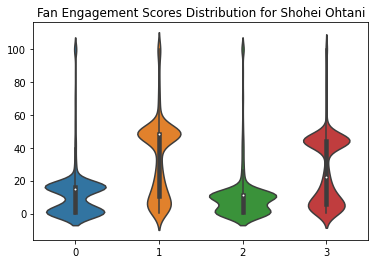

In [109]:
bx_data=target_df.loc['660271']
sns.violinplot(data=[bx_data['target1'], bx_data['target2'], bx_data['target3'], bx_data['target4']])
plt.title('Fan Engagement Scores Distribution for Shohei Ohtani')